In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Datasets/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## Overall Engagement Rate

In [3]:
# total customers who responded

df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

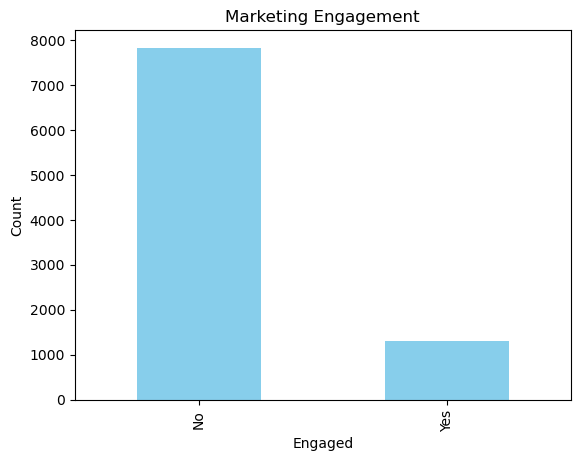

In [6]:
# plot on a bar chart

ax = df.groupby('Response').count()['Customer'].plot(
    kind='bar',
    color='skyblue',
    title='Marketing Engagement')

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

plt.show

In [7]:
# engagement rate calculation

df.groupby('Response').count()['Customer']/ df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

In [8]:
# Engagement rate by offer type

by_offer_type_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type'
]).count()['Customer'] / df.groupby('Renew Offer Type').count()['Customer']

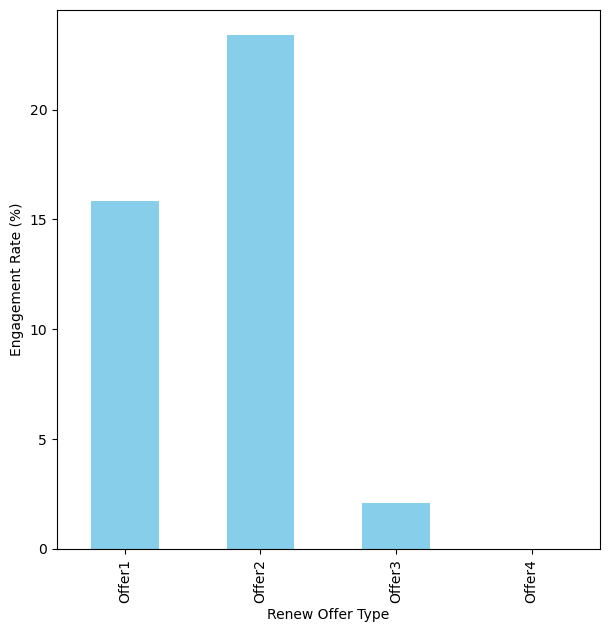

In [9]:
# visualise in a bar chart

ax = (by_offer_type_df * 100.0).plot(
    kind='bar',
    color='skyblue',
    figsize=(7,7)
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

## Engagement rates by offer type and vehicle class

In [14]:
#Engagement rates by offer type and vehicle class

by_offer_type_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type', 'Vehicle Class'
]).count()['Customer'] / df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [16]:
# make it more readable 

by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


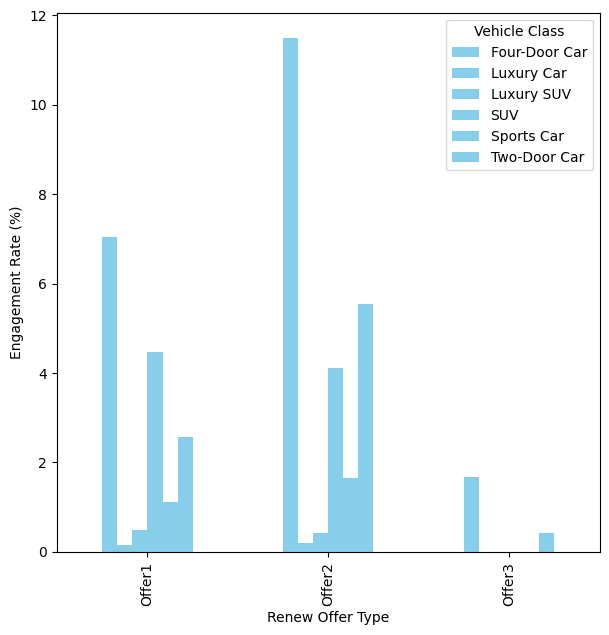

In [17]:
# visualise as bar plot

ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(7,7),
    color='skyblue')

ax.set_ylabel('Engagement Rate (%)')

plt.show()

## Engagement rates by sales channel

In [20]:
# engagement rate by sales channel

by_sales_channel_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel'
]).count()['Customer'] / df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

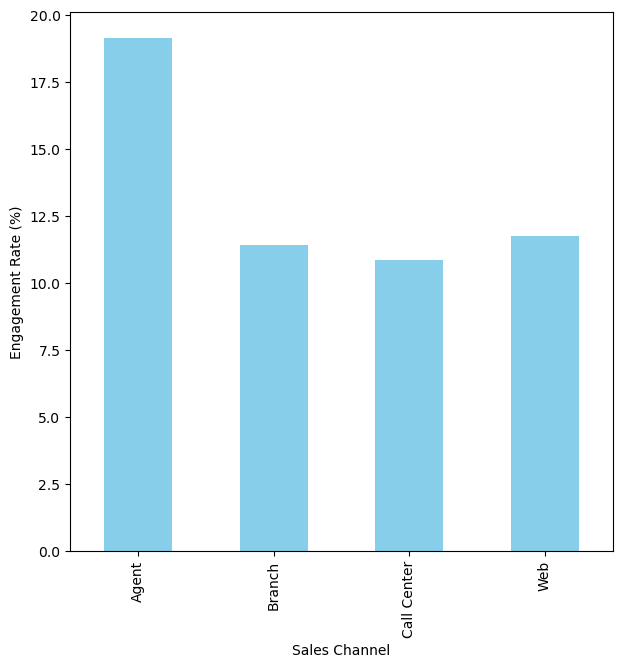

In [21]:
# visualising this as bar chart

ax = (by_sales_channel_df *100.0).plot(
    kind = 'bar',
    figsize=(7,7),
    color='skyblue')

ax.set_ylabel('Engagement Rate (%)')

plt.show()

In [29]:
# Engagement rates by channel and vehicle size

by_sales_channel_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel', 'Vehicle Size'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [30]:
# unstack to make more visible

by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


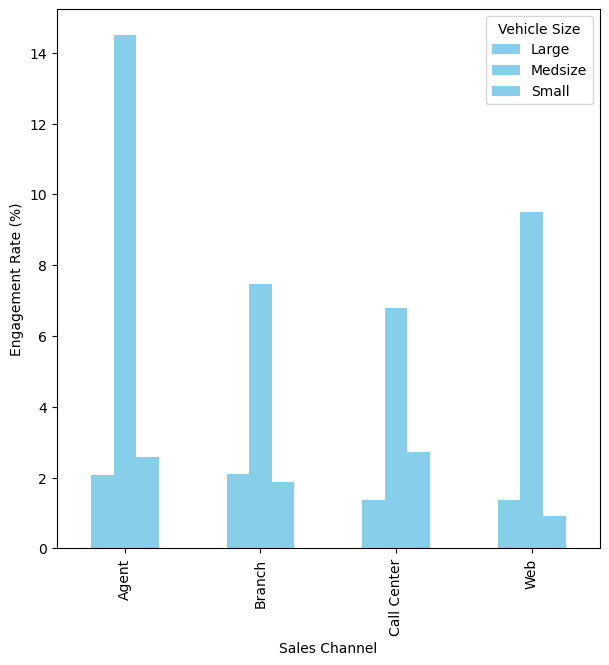

In [31]:
# visualise unstacked data
ax = (by_sales_channel_df *100.0).plot(
    kind = 'bar',
    figsize=(7,7),
    color='skyblue')

ax.set_ylabel('Engagement Rate (%)')

plt.show()

## Segmenting the customer base

In [32]:
# Customer Lifetime Value Segmentation

df['CLV Segment'] = df['Customer Lifetime Value'].apply(
        lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low')
df['CLV Segment']

0        Low
1       High
2       High
3       High
4        Low
        ... 
9129    High
9130     Low
9131    High
9132    High
9133     Low
Name: CLV Segment, Length: 9134, dtype: object

In [34]:
# Months since police

df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(
        lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'low')

df['Policy Age Segment']

0        low
1        low
2        low
3       High
4        low
        ... 
9129    High
9130     low
9131     low
9132     low
9133    High
Name: Policy Age Segment, Length: 9134, dtype: object

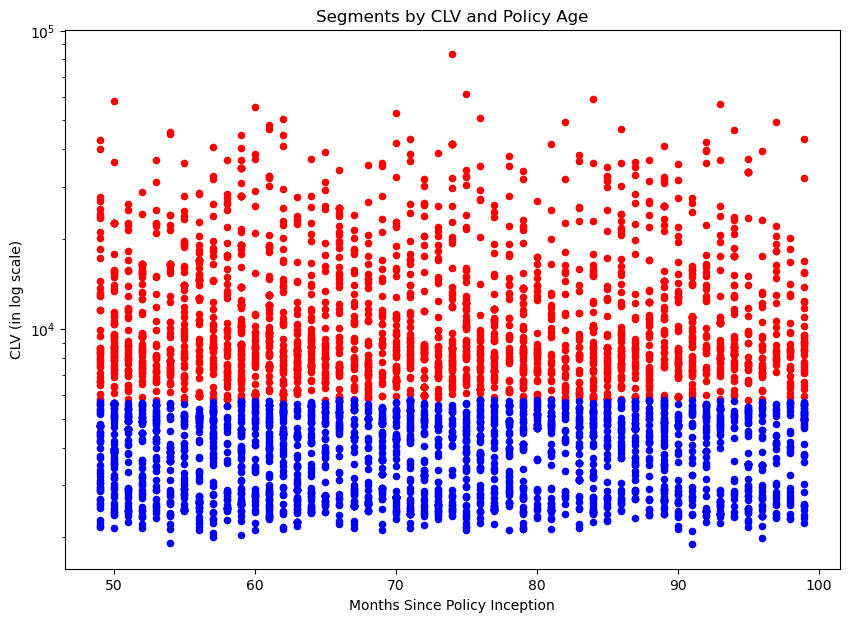

In [39]:
# Visualise in a scatterplot

ax = df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    logy = True,
    color = 'red'
)


df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    ax=ax,
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    logy = True,
    color = 'blue'
)


df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    logy = True,
    color = 'orange'
)
    

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    logy = True,
    color = 'green',
    figsize = (10,7)
)


ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')

ax.set_title('Segments by CLV and Policy Age')

plt.show()

In [41]:
# looking at differences between the engagement rates

engagement_rates_by_segment_df = df.loc[
    df['Response'] == 'Yes'
].groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer'] / df.groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']

engagement_rates_by_segment_df


CLV Segment  Policy Age Segment
High         High                  0.138728
             low                   0.132067
Low          High                  0.162450
             low                   0.139957
Name: Customer, dtype: float64

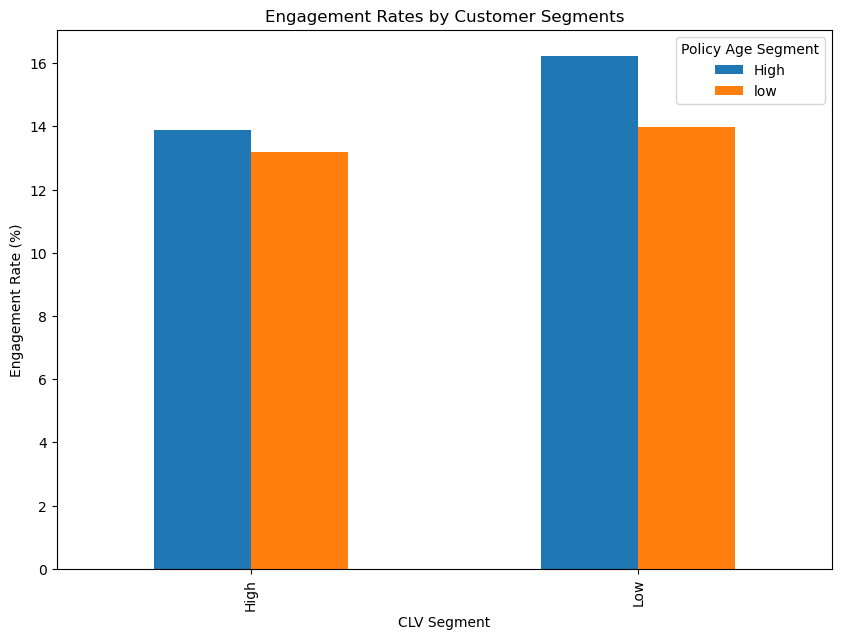

In [43]:
# Bar chart 

ax = (engagement_rates_by_segment_df.unstack()*100.0).plot(
    kind='bar',
    figsize=(10,7)
)

ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')

plt.show()